In [1]:
import pandas as pd

In [2]:
from time import sleep
from random import randint

In [3]:
import config

In [4]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [35]:
import numpy as np
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [5]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id, client_secret= config.client_secret))

In [6]:
playlist = sp.user_playlist_tracks("spotify", "5fo41o54DPTvdPO2uMTDH1",market="GB")

In [7]:
song_id = playlist["items"][1]['track']["id"]
song_id

'6iaSML1PIYq936g62BDtBq'

In [8]:
sp.audio_features(song_id)

[{'danceability': 0.623,
  'energy': 0.692,
  'key': 2,
  'loudness': -5.122,
  'mode': 1,
  'speechiness': 0.0504,
  'acousticness': 0.328,
  'instrumentalness': 0,
  'liveness': 0.153,
  'valence': 0.566,
  'tempo': 79.899,
  'type': 'audio_features',
  'id': '6iaSML1PIYq936g62BDtBq',
  'uri': 'spotify:track:6iaSML1PIYq936g62BDtBq',
  'track_href': 'https://api.spotify.com/v1/tracks/6iaSML1PIYq936g62BDtBq',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6iaSML1PIYq936g62BDtBq',
  'duration_ms': 240051,
  'time_signature': 4}]

In [9]:
len(playlist["items"])

100

In [10]:
username='spotify'
playlist_id='5fo41o54DPTvdPO2uMTDH1'

In [11]:
list_of_playlists = ['5fo41o54DPTvdPO2uMTDH1','37i9dQZF1DXbITWG1ZJKYt', '73wCNB78g3O2nIDLYJA35G', '2TNjpzZoERsFois0r7GF8V', '2UZk7JjJnbTut1w8fqs3JL', '4g3gKFVo0vY8W5QE0O2goI','4hvbZXAhxnqcybT7zNhHLn', '37i9dQZF1DX1Hya1sRqqxI', '39imuN0VtH1MDFj9zUZnWR', '2JRfbdOI60Mn8kswRG7H6q', '1lcbYKyLFvyLb5rZXbVVYc', '4NhDcZoiom7nsuhtgRgpCK', '0mIPq61j4OwkEI2PJqF4KM' 
]

In [12]:
list_of_playlists2 = ['0OzgFmOBqTe6CHNgJk9zpT','4c8MUTW1ipZsO7lM9t8BIa']

In [13]:
playlist = sp.user_playlist_tracks("spotify", "5fo41o54DPTvdPO2uMTDH1",market="GB")


In [14]:
song_id = playlist["items"][1]['track']["id"]
song_id

'6iaSML1PIYq936g62BDtBq'

In [15]:
sp.audio_features(song_id)


[{'danceability': 0.623,
  'energy': 0.692,
  'key': 2,
  'loudness': -5.122,
  'mode': 1,
  'speechiness': 0.0504,
  'acousticness': 0.328,
  'instrumentalness': 0,
  'liveness': 0.153,
  'valence': 0.566,
  'tempo': 79.899,
  'type': 'audio_features',
  'id': '6iaSML1PIYq936g62BDtBq',
  'uri': 'spotify:track:6iaSML1PIYq936g62BDtBq',
  'track_href': 'https://api.spotify.com/v1/tracks/6iaSML1PIYq936g62BDtBq',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6iaSML1PIYq936g62BDtBq',
  'duration_ms': 240051,
  'time_signature': 4}]

In [16]:

username = 'spotify'
playlist_id = '5fo41o54DPTvdPO2uMTDH1'


In [17]:

list_of_playlists = ['5fo41o54DPTvdPO2uMTDH1','37i9dQZF1DXbITWG1ZJKYt', '73wCNB78g3O2nIDLYJA35G', '2TNjpzZoERsFois0r7GF8V', '2UZk7JjJnbTut1w8fqs3JL', '4g3gKFVo0vY8W5QE0O2goI','4hvbZXAhxnqcybT7zNhHLn', '37i9dQZF1DX1Hya1sRqqxI', '39imuN0VtH1MDFj9zUZnWR', '2JRfbdOI60Mn8kswRG7H6q', '1lcbYKyLFvyLb5rZXbVVYc', '4NhDcZoiom7nsuhtgRgpCK', '0mIPq61j4OwkEI2PJqF4KM' 
                ]


In [18]:
list_of_playlists2 = [ '5fo41o54DPTvdPO2uMTDH1', '0OzgFmOBqTe6CHNgJk9zpT', '4c8MUTW1ipZsO7lM9t8BIa'] #0OzgFmOBqTe6CHNgJk9zpT -> sleep


In [19]:

def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results["items"]
    while results["next"]:
        results = sp.next(results)
        tracks.extend(results["items"])
    return tracks

In [20]:

list_of_tracks=[]

for playlist_id in list_of_playlists:
    list_of_tracks.extend(get_playlist_tracks(username, playlist_id))
len(list_of_tracks)


2634

In [21]:
def get_audio():
    playlist=get_playlist_tracks(username, playlist_id)
    audio_features=get_features(playlist)
    audio_df=pd.DataFrame(audio_features) 
    return audio_df


In [22]:

def get_features(playlist):
    list_of_audio_features=[]
    for index in range(len(playlist)):
        try:
            song_id = playlist[index]["track"]["id"]
            features = sp.audio_features(song_id)[0]
            list_of_audio_features.append(features)
        except:
            pass
    return(list_of_audio_features)

In [23]:
list_of_audio_features=[]
list_of_audio_features = [i for i in list_of_audio_features if i]


In [24]:
playlist1=get_playlist_tracks("spotify", "5fo41o54DPTvdPO2uMTDH1")
playlist1


[{'added_at': '2022-11-01T18:07:57Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/justin5566'},
   'href': 'https://api.spotify.com/v1/users/justin5566',
   'id': 'justin5566',
   'type': 'user',
   'uri': 'spotify:user:justin5566'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/67SeoU54DvDpkDDXtWEoOc'},
      'href': 'https://api.spotify.com/v1/artists/67SeoU54DvDpkDDXtWEoOc',
      'id': '67SeoU54DvDpkDDXtWEoOc',
      'name': 'MartinBepunkt',
      'type': 'artist',
      'uri': 'spotify:artist:67SeoU54DvDpkDDXtWEoOc'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/5KQ8edF4yq8BPBMxM8al9u'},
    'href': 'https://api.spotify.com/v1/albums/5KQ8edF4yq8BPBMxM8al9u',
    'id': '5KQ8edF4yq8BPBMxM8al9u',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b2735a5676021cfbd46baa390752',
   

In [25]:
list_of_audio_features = get_features(list_of_tracks)


len(list_of_audio_features)

2633

In [26]:
list_of_audio_features = [i for i in list_of_audio_features if i]


In [27]:
df=pd.DataFrame(list_of_audio_features)    
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.731,0.754,1,-5.372,1,0.1340,0.0694,0.000000,0.3290,0.670,138.038,audio_features,7A9VbC1Bs8Tz7gNrBwDOUX,spotify:track:7A9VbC1Bs8Tz7gNrBwDOUX,https://api.spotify.com/v1/tracks/7A9VbC1Bs8Tz...,https://api.spotify.com/v1/audio-analysis/7A9V...,144533,4
1,0.623,0.692,2,-5.122,1,0.0504,0.3280,0.000000,0.1530,0.566,79.899,audio_features,6iaSML1PIYq936g62BDtBq,spotify:track:6iaSML1PIYq936g62BDtBq,https://api.spotify.com/v1/tracks/6iaSML1PIYq9...,https://api.spotify.com/v1/audio-analysis/6iaS...,240051,4
2,0.702,0.792,8,-6.154,1,0.3620,0.0662,0.000647,0.1050,0.352,132.048,audio_features,7gpSIL1cTo9hRaJWzJ366l,spotify:track:7gpSIL1cTo9hRaJWzJ366l,https://api.spotify.com/v1/tracks/7gpSIL1cTo9h...,https://api.spotify.com/v1/audio-analysis/7gpS...,167230,4
3,0.719,0.426,1,-8.064,1,0.0792,0.3910,0.000110,0.1150,0.318,99.059,audio_features,2sFsvaMRe8PKo5AFdBE9qC,spotify:track:2sFsvaMRe8PKo5AFdBE9qC,https://api.spotify.com/v1/tracks/2sFsvaMRe8PK...,https://api.spotify.com/v1/audio-analysis/2sFs...,165477,4
4,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,6CDzDgIUqeDY5g8ujExx2f,spotify:track:6CDzDgIUqeDY5g8ujExx2f,https://api.spotify.com/v1/tracks/6CDzDgIUqeDY...,https://api.spotify.com/v1/audio-analysis/6CDz...,238805,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,0.661,0.908,5,-4.897,1,0.0390,0.0520,0.000000,0.0708,0.656,144.091,audio_features,6OnfBiiSc9RGKiBKKtZXgQ,spotify:track:6OnfBiiSc9RGKiBKKtZXgQ,https://api.spotify.com/v1/tracks/6OnfBiiSc9RG...,https://api.spotify.com/v1/audio-analysis/6Onf...,296080,4
2628,0.399,0.491,6,-10.778,0,0.0538,0.0563,0.000890,0.1100,0.151,91.066,audio_features,6AGOKlMZWLCaEJGnaROtF9,spotify:track:6AGOKlMZWLCaEJGnaROtF9,https://api.spotify.com/v1/tracks/6AGOKlMZWLCa...,https://api.spotify.com/v1/audio-analysis/6AGO...,210463,4
2629,0.333,0.637,1,-4.904,0,0.0581,0.1310,0.000018,0.1490,0.132,139.898,audio_features,5KCbr5ndeby4y4ggthdiAb,spotify:track:5KCbr5ndeby4y4ggthdiAb,https://api.spotify.com/v1/tracks/5KCbr5ndeby4...,https://api.spotify.com/v1/audio-analysis/5KCb...,172693,4
2630,0.448,0.838,4,-5.257,0,0.0557,0.2100,0.000131,0.1310,0.254,139.863,audio_features,45S5WTQEGOB1VHr1Q4FuPl,spotify:track:45S5WTQEGOB1VHr1Q4FuPl,https://api.spotify.com/v1/tracks/45S5WTQEGOB1...,https://api.spotify.com/v1/audio-analysis/45S5...,208907,4


In [28]:
list_of_playlists2 = ['0OzgFmOBqTe6CHNgJk9zpT','4c8MUTW1ipZsO7lM9t8BIa']

In [29]:
list_of_tracks2=[]

for playlist_id in list_of_playlists2:
    list_of_tracks2.extend(get_playlist_tracks(username, playlist_id))


In [30]:
list_of_audio_features2 = get_features(list_of_tracks2)


In [31]:
df2=pd.DataFrame(list_of_audio_features2)    

df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.677,0.749,4,-5.405,1,0.0391,0.3460,0.0000,0.3470,0.469,107.048,audio_features,4zizqK3nIOj9BwChgAtV1E,spotify:track:4zizqK3nIOj9BwChgAtV1E,https://api.spotify.com/v1/tracks/4zizqK3nIOj9...,https://api.spotify.com/v1/audio-analysis/4ziz...,199867,4
1,0.683,0.388,7,-6.488,1,0.0550,0.1220,0.0000,0.0661,0.700,85.083,audio_features,2M3sedAgHZHws7dWTiDlEl,spotify:track:2M3sedAgHZHws7dWTiDlEl,https://api.spotify.com/v1/tracks/2M3sedAgHZHw...,https://api.spotify.com/v1/audio-analysis/2M3s...,214560,4
2,0.499,0.610,8,-5.110,0,0.1350,0.4730,0.0000,0.0722,0.436,172.969,audio_features,38JAoElYA1uD3EPi09Iy1a,spotify:track:38JAoElYA1uD3EPi09Iy1a,https://api.spotify.com/v1/tracks/38JAoElYA1uD...,https://api.spotify.com/v1/audio-analysis/38JA...,260773,3
3,0.611,0.385,6,-9.844,0,0.0436,0.3590,0.0000,0.0635,0.325,99.780,audio_features,7cNl9yAs9sScxAPIjM1fb4,spotify:track:7cNl9yAs9sScxAPIjM1fb4,https://api.spotify.com/v1/tracks/7cNl9yAs9sSc...,https://api.spotify.com/v1/audio-analysis/7cNl...,304667,4
4,0.710,0.469,0,-7.611,1,0.0415,0.2110,0.2140,0.0369,0.170,124.998,audio_features,0yAv6ZMtepBgggOKcwxXHE,spotify:track:0yAv6ZMtepBgggOKcwxXHE,https://api.spotify.com/v1/tracks/0yAv6ZMtepBg...,https://api.spotify.com/v1/audio-analysis/0yAv...,283771,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,0.675,0.466,11,-9.738,0,0.2010,0.3610,0.0000,0.1100,0.347,140.864,audio_features,6wAFvJPpTZVirBKGZ4EnMW,spotify:track:6wAFvJPpTZVirBKGZ4EnMW,https://api.spotify.com/v1/tracks/6wAFvJPpTZVi...,https://api.spotify.com/v1/audio-analysis/6wAF...,148781,4
2036,0.551,0.550,10,-5.339,1,0.0286,0.7770,0.0000,0.2020,0.342,101.190,audio_features,1Y3LN4zO1Edc2EluIoSPJN,spotify:track:1Y3LN4zO1Edc2EluIoSPJN,https://api.spotify.com/v1/tracks/1Y3LN4zO1Edc...,https://api.spotify.com/v1/audio-analysis/1Y3L...,176440,3
2037,0.594,0.629,8,-4.919,1,0.0246,0.0868,0.0000,0.1370,0.504,131.597,audio_features,41sjzdjScVwnxnxADElts6,spotify:track:41sjzdjScVwnxnxADElts6,https://api.spotify.com/v1/tracks/41sjzdjScVwn...,https://api.spotify.com/v1/audio-analysis/41sj...,236053,4
2038,0.686,0.571,4,-7.138,1,0.0500,0.0660,0.0000,0.0608,0.538,117.889,audio_features,4e5ayHsOLJNLTGfjau2mEw,spotify:track:4e5ayHsOLJNLTGfjau2mEw,https://api.spotify.com/v1/tracks/4e5ayHsOLJNL...,https://api.spotify.com/v1/audio-analysis/4e5a...,240467,4


In [32]:
sp.audio_features(song_id)[0]

{'danceability': 0.623,
 'energy': 0.692,
 'key': 2,
 'loudness': -5.122,
 'mode': 1,
 'speechiness': 0.0504,
 'acousticness': 0.328,
 'instrumentalness': 0,
 'liveness': 0.153,
 'valence': 0.566,
 'tempo': 79.899,
 'type': 'audio_features',
 'id': '6iaSML1PIYq936g62BDtBq',
 'uri': 'spotify:track:6iaSML1PIYq936g62BDtBq',
 'track_href': 'https://api.spotify.com/v1/tracks/6iaSML1PIYq936g62BDtBq',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6iaSML1PIYq936g62BDtBq',
 'duration_ms': 240051,
 'time_signature': 4}

In [34]:
final_df = pd.concat([df, df2])
final_df = final_df.drop(["track_href", "analysis_url", "mode", "key", "type", "time_signature", "uri"],axis = 1)
final_df  

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.731,0.754,-5.372,0.1340,0.0694,0.000000,0.3290,0.670,138.038,7A9VbC1Bs8Tz7gNrBwDOUX,144533
1,0.623,0.692,-5.122,0.0504,0.3280,0.000000,0.1530,0.566,79.899,6iaSML1PIYq936g62BDtBq,240051
2,0.702,0.792,-6.154,0.3620,0.0662,0.000647,0.1050,0.352,132.048,7gpSIL1cTo9hRaJWzJ366l,167230
3,0.719,0.426,-8.064,0.0792,0.3910,0.000110,0.1150,0.318,99.059,2sFsvaMRe8PKo5AFdBE9qC,165477
4,0.761,0.525,-6.900,0.0944,0.4400,0.000007,0.0921,0.531,80.870,6CDzDgIUqeDY5g8ujExx2f,238805
...,...,...,...,...,...,...,...,...,...,...,...
2035,0.675,0.466,-9.738,0.2010,0.3610,0.000000,0.1100,0.347,140.864,6wAFvJPpTZVirBKGZ4EnMW,148781
2036,0.551,0.550,-5.339,0.0286,0.7770,0.000000,0.2020,0.342,101.190,1Y3LN4zO1Edc2EluIoSPJN,176440
2037,0.594,0.629,-4.919,0.0246,0.0868,0.000000,0.1370,0.504,131.597,41sjzdjScVwnxnxADElts6,236053
2038,0.686,0.571,-7.138,0.0500,0.0660,0.000000,0.0608,0.538,117.889,4e5ayHsOLJNLTGfjau2mEw,240467


In [39]:
X = final_df
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000,4672.000000
mean,0.630032,0.627712,-7.316545,0.086485,0.277216,0.043977,0.174905,0.515391,120.854147,223259.493793
std,0.140805,0.204425,3.380306,0.090066,0.273698,0.165830,0.145940,0.240679,28.309332,65481.724318
min,0.129000,0.007560,-27.331000,0.022700,0.000002,0.000000,0.019500,0.034600,49.689000,21600.000000
25%,0.537000,0.489000,-8.829500,0.035700,0.054075,0.000000,0.092100,0.323000,99.900500,184109.250000
50%,0.636000,0.650000,-6.603000,0.049900,0.177000,0.000001,0.117000,0.510000,119.638500,211490.500000
75%,0.730000,0.795000,-5.032750,0.092325,0.441000,0.000216,0.203250,0.710000,139.980250,245460.000000
max,0.979000,1.000000,-0.180000,0.840000,0.995000,0.965000,0.989000,0.989000,219.893000,824133.000000


In [40]:
df_numerical = X[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo',
 'duration_ms']]



In [41]:
scaler = StandardScaler()
scaler.fit(df_numerical)
X_scaled = scaler.transform(df_numerical)
X_scaled_df = pd.DataFrame(X_scaled, columns = df_numerical.columns) #pd.Dataframe to receive a dataframe instead of a numpy array 
display(df_numerical.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.731,0.754,-5.372,0.1340,0.0694,0.000000,0.3290,0.670,138.038,144533
1,0.623,0.692,-5.122,0.0504,0.3280,0.000000,0.1530,0.566,79.899,240051
2,0.702,0.792,-6.154,0.3620,0.0662,0.000647,0.1050,0.352,132.048,167230
3,0.719,0.426,-8.064,0.0792,0.3910,0.000110,0.1150,0.318,99.059,165477
4,0.761,0.525,-6.900,0.0944,0.4400,0.000007,0.0921,0.531,80.870,238805


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.717154,0.617837,0.575319,0.527617,-0.759370,-0.265222,1.055991,0.642454,0.607068,-1.202395
1,-0.049946,0.314515,0.649284,-0.400693,0.185569,-0.265222,-0.150111,0.210297,-1.446856,0.256458
2,0.511173,0.803743,0.343954,3.059371,-0.771063,-0.261320,-0.479048,-0.678950,0.395454,-0.855742
3,0.631920,-0.986833,-0.221144,-0.080893,0.415774,-0.264559,-0.410520,-0.820232,-0.769975,-0.882516
4,0.930237,-0.502496,0.123240,0.087891,0.594823,-0.265182,-0.567450,0.064859,-1.412553,0.237428


In [42]:

X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,4.672000e+03,4.672000e+03,4.672000e+03,4.672000e+03,4.672000e+03,4.672000e+03,4.672000e+03,4.672000e+03,4.672000e+03,4.672000e+03
mean,-1.158819e-16,3.126067e-16,3.636087e-16,1.327182e-16,-1.158344e-16,1.594829e-15,-1.045587e-17,-3.340174e-16,-1.304607e-16,5.506856e-16
std,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00,1.000107e+00
min,-3.558716e+00,-3.033960e+00,-5.921533e+00,-7.082789e-01,-1.012956e+00,-2.652224e-01,-1.064968e+00,-1.997862e+00,-2.514110e+00,-3.079960e+00
25%,-6.607845e-01,-6.786186e-01,-4.476272e-01,-5.639245e-01,-8.153688e-01,-2.652224e-01,-5.674503e-01,-7.994556e-01,-7.402467e-01,-5.979445e-01
50%,4.239012e-02,1.090391e-01,2.111114e-01,-4.062451e-01,-3.661938e-01,-2.652154e-01,-3.968141e-01,-2.240319e-02,-4.294617e-02,-1.797487e-01
75%,7.100509e-01,8.184203e-01,6.756900e-01,6.484991e-02,5.984773e-01,-2.639182e-01,1.942448e-01,8.086689e-01,6.756836e-01,3.390699e-01
max,2.478642e+00,1.821339e+00,2.111438e+00,8.367171e+00,2.622825e+00,5.554622e+00,5.578877e+00,1.968014e+00,3.498827e+00,9.177184e+00


In [52]:
kmeans = KMeans(n_clusters=6,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans.fit(X_scaled_df)
print(kmeans.inertia_)

28056.059893664336


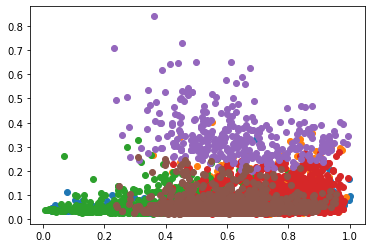

In [53]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [54]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     206
1     448
2     809
3    1583
4     343
5    1283
dtype: int64

In [55]:
X["cluster"] = clusters
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.731,0.754,-5.372,0.1340,0.0694,0.000000,0.3290,0.670,138.038,7A9VbC1Bs8Tz7gNrBwDOUX,144533,1
1,0.623,0.692,-5.122,0.0504,0.3280,0.000000,0.1530,0.566,79.899,6iaSML1PIYq936g62BDtBq,240051,3
2,0.702,0.792,-6.154,0.3620,0.0662,0.000647,0.1050,0.352,132.048,7gpSIL1cTo9hRaJWzJ366l,167230,4
3,0.719,0.426,-8.064,0.0792,0.3910,0.000110,0.1150,0.318,99.059,2sFsvaMRe8PKo5AFdBE9qC,165477,2
4,0.761,0.525,-6.900,0.0944,0.4400,0.000007,0.0921,0.531,80.870,6CDzDgIUqeDY5g8ujExx2f,238805,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2035,0.675,0.466,-9.738,0.2010,0.3610,0.000000,0.1100,0.347,140.864,6wAFvJPpTZVirBKGZ4EnMW,148781,5
2036,0.551,0.550,-5.339,0.0286,0.7770,0.000000,0.2020,0.342,101.190,1Y3LN4zO1Edc2EluIoSPJN,176440,2
2037,0.594,0.629,-4.919,0.0246,0.0868,0.000000,0.1370,0.504,131.597,41sjzdjScVwnxnxADElts6,236053,5
2038,0.686,0.571,-7.138,0.0500,0.0660,0.000000,0.0608,0.538,117.889,4e5ayHsOLJNLTGfjau2mEw,240467,5


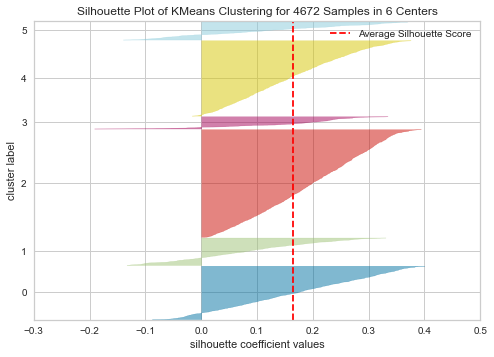

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4672 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show() 

In [61]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [63]:

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_6.pickle", "wb") as f:
    pickle.dump(kmeans,f)

FileNotFoundError: [Errno 2] No such file or directory: 'Model/scaler.pickle'